## Importing data and packages

### Install packages

In [43]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
import os
import numpy as np
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from scipy import stats
from statistics import mean 
import seaborn as sns
import random

[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ucloud/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Load data and randomly sample

In [2]:
random.seed(123)

# reading data
df = pd.read_csv('data/all_data.csv')

# printing the head of the dataframe
print(df.head())

# randomly sampling 1000 lines
df_sampled = df.sample(n=1000, random_state=1)

# exporting it so we don't have to load the whole dataset if not neccessary
df_sampled.to_csv('data/all_data_sampled.csv')

        id                                       comment_text  split  \
0  1083994  He got his money... now he lies in wait till a...  train   
1   650904  Mad dog will surely put the liberals in mental...  train   
2  5902188  And Trump continues his lifelong cowardice by ...  train   
3  7084460  "while arresting a man for resisting arrest".\...   test   
4  5410943     Tucker and Paul are both total bad ass mofo's.  train   

                    created_date  publication_id  parent_id  article_id  \
0  2017-03-06 15:21:53.675241+00              21        NaN      317120   
1  2016-12-02 16:44:21.329535+00              21        NaN      154086   
2  2017-09-05 19:05:32.341360+00              55        NaN      374342   
3  2016-11-01 16:53:33.561631+00              13        NaN      149218   
4  2017-06-14 05:08:21.997315+00              21        NaN      344096   

     rating  funny  wow  ...  white  asian  latino  other_race_or_ethnicity  \
0  approved      0    0  ...    NaN  

In [3]:
# reading data again
df_sampled = pd.read_csv('data/all_data_sampled.csv')

# making sure that the comments are strings
df_sampled['comment_text'] = df_sampled['comment_text'].astype("string")
print(df_sampled['comment_text'])

0                    and then there's Justin's tax plan.
1      "When you remain closed up in your own prejudi...
2      here's a GOOD ONE for you Rex=
The Québécoise ...
3      '
Rex Tillerson: 'A Christmas gift to the Russ...
4      I think the school system, from kindergarten t...
                             ...                        
995    Will Justin Trudeau walk the talk and become t...
996                                            thank you
997    Their story is similar were with his brothers ...
998    Save it. 

Anyone that wants to can google "ra...
999    "That sound like “victim” to me, much to your ...
Name: comment_text, Length: 1000, dtype: string


## Data preparation for NLP

### Removing special characters

In [5]:
unclean_array = df_sampled['comment_text']

unclean_str_new = [0] * len(unclean_array)

i = 0

for x in unclean_array:
    unclean_str_new[i] = re.sub('[^a-zA-Z.\d\s]', '', x)
    i = i+1

### Removing stopwords

In [6]:
tokens_wo_stopwords = [0] * len(unclean_array)
i = 0

for x in unclean_str_new:
    # convert text to lowercase and split to a list of words
    tokens = word_tokenize(x.lower())
    english_stopwords = stopwords.words('english')
    tokens_wo_stopwords[i] = [t for t in tokens if t not in english_stopwords]
    i = i+1
    tokens = 0
    
df_sampled['comment_token'] = tokens_wo_stopwords

# printing the head of the dataframe (for double-checking)
df_sampled['comment_token'].head()

0                      [theres, justins, tax, plan, .]
1    [remain, closed, prejudices, slave, idols, fal...
2    [heres, good, one, rex, qubcoise, transgender,...
3    [rex, tillerson, christmas, gift, russian, peo...
4    [think, school, system, kindergarten, ua, need...
Name: comment_token, dtype: object

### Stemming

In [7]:
porter = PorterStemmer()

i = 0
comment_clean = [0] * len(df_sampled['comment_token'])
stemmed_token = list()

for comments in df_sampled['comment_token']:
    for words in comments:
        stemmed = porter.stem(words)
        stemmed_token.append(stemmed)
    comment_clean[i] = stemmed_token
    i = i+1
    stemmed_token = list() #empyting the list again

# adding the stemmed tokens to the dataframe
df_sampled['comment_clean'] = comment_clean

# printing the head of the dataframe (for double-checking)
df_sampled['comment_clean'].head()

0                        [there, justin, tax, plan, .]
1    [remain, close, prejudic, slave, idol, fals, g...
2    [here, good, one, rex, qubcois, transgend, act...
3    [rex, tillerson, christma, gift, russian, peop...
4    [think, school, system, kindergarten, ua, need...
Name: comment_clean, dtype: object

### Saving the tokenized data

In [8]:
df_sampled.to_csv('data/all_data_tokenized.csv')

## Analysis

### WordCloud

In [9]:
# most used words with the tag 'threat' as a wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# filtering the dataset so only the comments with the 'threat' label will be used
# we handle the threat values as if they were binary
df_threat = df_sampled[df_sampled['threat']>0]

# creating a corpus of text
corpus_threat = ''

for comment in df_threat['comment_clean']:  
    corpus_threat += ' '.join(comment)

# creating the wordcloud
word_cloud_threat = WordCloud(collocations = False, background_color = 'white').generate(corpus_threat)

# plotting it
plt.imshow(word_cloud_threat, interpolation='bilinear')
plt.axis("off")
plt.show()

# most used words with the tag 'toxicity' as a wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# filtering the dataset so only the comments with the 'threat' label will be used
# we handle the threat values as if they were binary
df_toxicity = df_sampled[df_sampled['toxicity']>0]

# creating a corpus of text
corpus_toxicity = ''

for comment in df_toxicity['comment_clean']:  
    corpus_toxicity += ' '.join(comment)

# creating the wordcloud
word_cloud_toxicity = WordCloud(collocations = False, background_color = 'white').generate(corpus_toxicity)

# plotting it
plt.imshow(word_cloud_toxicity, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

### Correlation plot

0.3544892078697488
1149


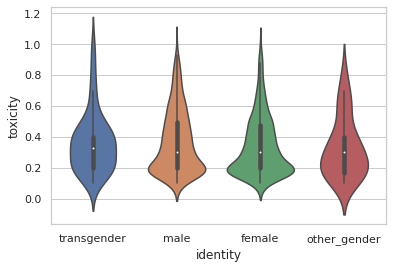

In [10]:
# correlation between target gender and sexuality and toxicity
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
%matplotlib inline

# there is not a lot of data about gender and sexuality, so I used a bigger dataset here
# randomly sampling 1000 lines
df_sampled_toxicity = df.sample(n=50000, random_state=1)

# filtering the dataset so only the comments with the 'toxicity' label will be used (but this time with the bigger dataset)
df_toxicity_big = df_sampled_toxicity[df_sampled_toxicity['toxicity']>0]

# removing nas
df_toxicity_big = df_toxicity_big.dropna()

# resetting indexing (because of the dropna function)
df_toxicity_big = df_toxicity_big.reset_index(drop=True)

#creating an empty list for the values
identity_df = pd.DataFrame(columns=['identity', 'identity_value', 'toxicity'])

identities = list()
values = list()
toxicity = list()

i2 = 0

for i in range(0, len(df_toxicity_big)):
    if(df_toxicity_big['male'][i]>0):
        identities.append('male')
        values.append(df_toxicity_big['male'][i])
        toxicity.append(df_toxicity_big['toxicity'][i])
        i2 = i2 + 1
    if(df_toxicity_big['female'][i] > 0.0):
        identities.append('female')
        values.append(df_toxicity_big['female'][i])
        toxicity.append(df_toxicity_big['toxicity'][i])
        i2 = i2 + 1
    if(df_toxicity_big['transgender'][i] > 0.0):
        identities.append('transgender')
        values.append(df_toxicity_big['transgender'][i])
        toxicity.append(df_toxicity_big['toxicity'][i])
        i2 = i2 + 1
    if(df_toxicity_big['other_gender'][i] > 0.0):
        identities.append('other_gender')
        values.append(df_toxicity_big['other_gender'][i])
        toxicity.append(df_toxicity_big['toxicity'][i])
        i2 = i2 + 1

# adding these values to the empty dataframe        
identity_df['identity'] = identities
identity_df['identity_value'] = values
identity_df['toxicity'] = toxicity

seaborn.set(style = 'whitegrid')
    
seaborn.violinplot(x = "identity",
             y = "toxicity",
             data = identity_df)

print(mean(toxicity))
print(len(toxicity))

### Correlation analysis

In [11]:
# preforming Pearsons correlation test to check their relationship
transgender_tox_corr_r, transgender_tox_corr_p = stats.pearsonr(identity_df.loc[identity_df['identity'] == 'transgender', 'toxicity'], identity_df.loc[identity_df['identity'] == 'transgender', 'identity_value'])
print(f'Pearson correlation between transgender people and toxicity: {transgender_tox_corr_r} (p = {transgender_tox_corr_p})')
male_tox_corr_r, male_tox_corr_p = stats.pearsonr(identity_df.loc[identity_df['identity'] == 'male', 'toxicity'], identity_df.loc[identity_df['identity'] == 'male', 'identity_value'])
print(f'Pearson correlation between male and toxicity: {male_tox_corr_r} (p = {male_tox_corr_p})')
female_tox_corr_r, female_tox_corr_p = stats.pearsonr(identity_df.loc[identity_df['identity'] == 'female', 'toxicity'], identity_df.loc[identity_df['identity'] == 'female', 'identity_value'])
print(f'Pearson correlation between female and toxicity: {female_tox_corr_r} (p = {female_tox_corr_p})')
other_tox_corr_r, other_tox_corr_p = stats.pearsonr(identity_df.loc[identity_df['identity'] == 'other_gender', 'toxicity'], identity_df.loc[identity_df['identity'] == 'other_gender', 'identity_value'])
print(f'Pearson correlation between other genders and toxicity: {other_tox_corr_r} (p = {other_tox_corr_p})')

Pearson correlation between transgender people and toxicity: 0.04742859466940919 (p = 0.7436130797242412)
Pearson correlation between male and toxicity: -0.06060134890542804 (p = 0.15208606782665096)
Pearson correlation between female and toxicity: -0.06894306876424294 (p = 0.11850017057808947)
Pearson correlation between other genders and toxicity: 0.2590892577111078 (p = 0.21107581662095257)


### Sentiment analysis

In [12]:
# sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

i = 0
sentiment = [0] * len(df_sampled['comment_text'])
compound = [0] * len(df_sampled['comment_text']) # compound score is the overall score (between -1 and 1)

for comment in df_sampled['comment_text']:
    sentiment[i] = sia.polarity_scores(comment)
    compound[i] = sia.polarity_scores(comment)['compound']
    i = i + 1
    
df_sampled['sentiment_all'] = sentiment
df_sampled['sentiment_compound'] = compound

# printing the head of the dataframe (for double-checking)
print(df_sampled['sentiment_all'].head())
print(df_sampled['sentiment_compound'].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ucloud/nltk_data...


0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.074, 'neu': 0.752, 'pos': 0.174, 'co...
2    {'neg': 0.059, 'neu': 0.761, 'pos': 0.181, 'co...
3    {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...
4    {'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...
Name: sentiment_all, dtype: object
0    0.0000
1    0.7901
2    0.9413
3    0.4404
4    0.8555
Name: sentiment_compound, dtype: float64


Approved comments:  919
Rejected comments:  81
-0.01
-0.16


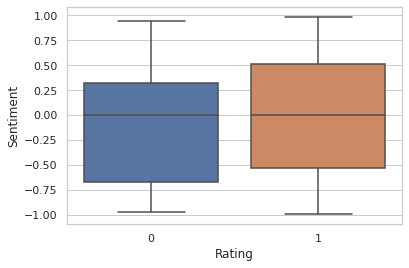

Ttest_indResult(statistic=45.89583417513346, pvalue=1.126620163e-314)


In [54]:
random.seed(123)

# correlation between acceptance and the sentiment of the posts
import statistics

# creating two datasets for the compound values of each category
approved_sentiments = df_sampled['sentiment_compound'][df_sampled['rating'] == 'approved']
rejected_sentiments = df_sampled['sentiment_compound'][df_sampled['rating'] == 'rejected']

print("Approved comments: ", len(approved_sentiments))
print("Rejected comments: ", len(rejected_sentiments))
# it is quite unbalanced, but it's still interesting to try

# creating a df for each category
approved_sentiments_df = pd.DataFrame()
approved_sentiments_df['sentiment_compounds'] = approved_sentiments
approved_sentiments_df['rating'] = 1

rejected_sentiments_df = pd.DataFrame()
rejected_sentiments_df['sentiment_compounds'] = rejected_sentiments
rejected_sentiments_df['rating'] = 0

# combining them
acceptance_sentiments = pd.concat([approved_sentiments_df,rejected_sentiments_df], axis=0)
acceptance_sentiments = acceptance_sentiments.iloc[:, 0:2]

# calculating means
accepted_mean = round(statistics.mean(approved_sentiments), 2)
print(accepted_mean)
rejected_mean = round(statistics.mean(rejected_sentiments), 2)
print(rejected_mean)

# plot
ax = sns.boxplot( x=acceptance_sentiments['rating'], y=acceptance_sentiments['sentiment_compounds']).set(
    xlabel='Rating', 
    ylabel='Sentiment'
)
plt.show()

# correlation analysis
t = stats.ttest_ind(acceptance_sentiments['rating'], acceptance_sentiments['sentiment_compounds'])
print(t)

In [47]:
print(acceptance_sentiments)

     sentiment_compounds    rating
0                 0.0000  approved
1                 0.7901  approved
2                 0.9413  approved
3                 0.4404  approved
4                 0.8555  approved
..                   ...       ...
965              -0.9041  rejected
971               0.0000  rejected
972              -0.6695  rejected
980               0.4019  rejected
983              -0.9757  rejected

[1000 rows x 2 columns]
